In [1]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

## Numerical perturbation analysis example 

#### (a) u1 = -2 , u2 = -3 

In [2]:
u = np.array([-2, -3])
x = cp.Variable(2)
Q = np.array([[1, -0.5], [-0.5, 2]])
eigvals = np.linalg.eigvals(Q)
if np.sum(eigvals>0) == len(eigvals):
    print("Q is semidefinite")

Q is semidefinite


In [3]:
obj = cp.Minimize(cp.quad_form(x, Q) -x[0])
constraints = [x[0] + 2*x[1] - u[0] <= 0,
               x[0] - 4*x[1] - u[1] <= 0,
               5*x[0] + 76*x[1] -1 <= 0]
prob = cp.Problem(obj, constraints)
prob.solve()
print("status :", prob.status)
print("optimal value :", prob.value)
print("optimal x value :", x.value)
print("optimal dual variable values :")
for i in range(len(constraints)):
    print(f"    lambda {i} : {constraints[i].dual_value}")

status : optimal
optimal value : 8.222222222222223
optimal x value : [-2.33333333  0.16666667]
optimal dual variable values :
    lambda 0 : 2.747741246681633
    lambda 1 : 2.885233448461934
    lambda 2 : 0.040071727637953566


In [4]:
# check for KKT conditions
print("==== check slack complementary condition ====")
print(x[0].value + 2*x[1].value -u[0])
print(x[0].value - 4*x[1].value -u[1])
print(5*x[0].value + 76*x[1].value - 1)
print()

print("==== check gradient for lagrangian ====")
x1, x2= x[0].value, x[1].value
l1, l2, l3 = [constraints[i].dual_value for i in range(len(constraints))]
print("\partial f/x1 = ", 2*x1 - x2 - 1 + l1 + l2 + 5*l3)
print("\partial f/x2 = ", 4*x2 - x1 + 2*l1 -4*l2 + 76*l3)

==== check slack complementary condition ====
4.440892098500626e-16
0.0
5.329070518200751e-15

==== check gradient for lagrangian ====
\partial f/x1 =  1.887379141862766e-15
\partial f/x2 =  0.0


#### (b) perturbed version 

In [3]:
pertur = [0, -0.1, 0.1]
p_original = 8.2222                                                                                                
l1,l2 = 2.747741246681633, 2.885233448461934
for delta1 in pertur:
    for delta2 in pertur:
        pertur_u = u + np.array([delta1, delta2])
        obj = cp.Minimize(cp.quad_form(x, Q) -x[0])
        constraints = [x[0] + 2*x[1] - pertur_u[0] <= 0,
                       x[0] - 4*x[1] - pertur_u[1] <= 0,
                       5*x[0] + 76*x[1] -1 <= 0]
        prob = cp.Problem(obj, constraints)
        p_exact = prob.solve()
        p_pred = p_original - l1*delta1 - l2*delta2
        print(f"delta1 = {delta1:.2f}, delta2 = {delta2:.2f}, \
        p_pred = {p_pred:.3f}, p_exact = {p_exact:.3f}")
        print("check p_pred <= p_exact :", p_pred <= p_exact)
        

delta1 = 0.00, delta2 = 0.00,         p_pred = 8.222, p_exact = 8.222
check p_pred <= p_exact : True
delta1 = 0.00, delta2 = -0.10,         p_pred = 8.511, p_exact = 8.706
check p_pred <= p_exact : True
delta1 = 0.00, delta2 = 0.10,         p_pred = 7.934, p_exact = 7.980
check p_pred <= p_exact : True
delta1 = -0.10, delta2 = 0.00,         p_pred = 8.497, p_exact = 8.565
check p_pred <= p_exact : True
delta1 = -0.10, delta2 = -0.10,         p_pred = 8.785, p_exact = 8.816
check p_pred <= p_exact : True
delta1 = -0.10, delta2 = 0.10,         p_pred = 8.208, p_exact = 8.319
check p_pred <= p_exact : True
delta1 = 0.10, delta2 = 0.00,         p_pred = 7.947, p_exact = 8.222
check p_pred <= p_exact : True
delta1 = 0.10, delta2 = -0.10,         p_pred = 8.236, p_exact = 8.706
check p_pred <= p_exact : True
delta1 = 0.10, delta2 = 0.10,         p_pred = 7.659, p_exact = 7.752
check p_pred <= p_exact : True


## A simple example 

#### (a) Analysis of primal problem  

In [30]:
x = cp.Variable()
constraint = [x >= 2, x <= 4]
obj = cp.Minimize(cp.square(x) + 1)
prob = cp.Problem(obj, constraint)
prob.solve()
print("status :", prob.status)
print("optimal value :", prob.value)
print("optimal solution :", x.value)
print("lambda :", constraint[0].dual_value)

status : optimal
optimal value : 5.000000000000002
optimal solution : 2.0000000000000004
lambda : 4.000000000000001


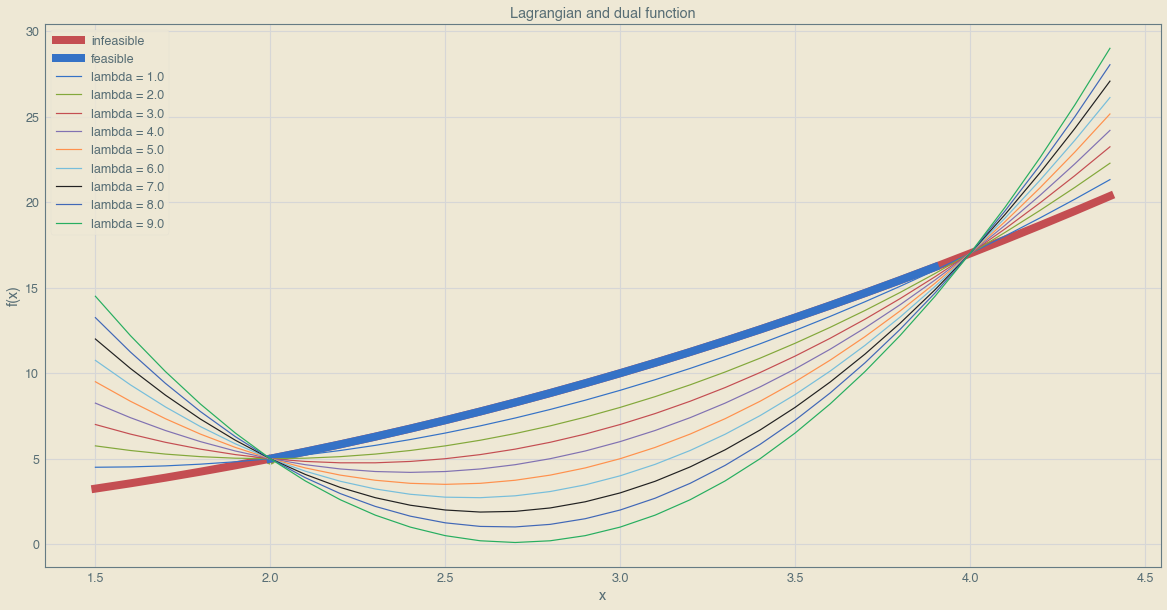

In [27]:
domain = np.arange(1.5, 4.5, 0.1)
lbd = np.arange(1, 10, 1)
fx = domain**2 + 1
domain_ = np.arange(2, 4, 0.1)
plt.figure(figsize = (20, 10))
plt.plot(domain, domain**2 + 1, c = 'r', linewidth = 8, label = "infeasible")
plt.plot(domain_, domain_**2 + 1, c = 'b', linewidth = 8, label = "feasible")
plt.scatter([x.value], [prob.value], c = 'g',s = 100)
for l in lbd:
     plt.plot(domain, domain**2 + 1 + l*(domain - 2)*(domain -4), label = f"lambda = {l:.1f}")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Lagrangian and dual function")
plt.legend()

Text(0, 0.5, 'Lagrange dual function g')

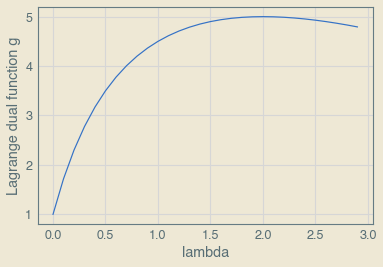

In [29]:
dual_domain = np.arange(0, 3, 0.1)
plt.plot(dual_domain, -9/(dual_domain + 1)-dual_domain + 10)
plt.xlabel("lambda")
plt.ylabel("Lagrange dual function g")

#### (c) Lagrange dual problem 

#### (d) Sensitivity analysis  

Text(0, 0.5, 'P_u')

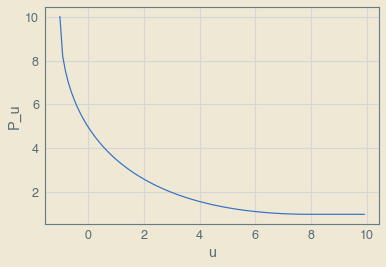

In [36]:
U = np.arange(-1, 10, 0.1)
P_u = []
for u in U:
    constraints = [cp.square(x) - 6*x + 8 <= u]
    obj = cp.Minimize(cp.square(x) + 1)
    prob = cp.Problem(obj, constraints)
    prob.solve()
    P_u += [prob.value]
plt.plot(U, P_u)
plt.xlabel("u")
plt.ylabel("P_u")

## Lagrangian relaxation of Boolean LP